In [24]:
import os
import cv2
import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json


In [20]:
normal_img = os.listdir('normal')
path = './normal'
img_width = []
img_height = []

B = []
G = []
R = []

for file in normal_img:
    
    file_path = os.path.join(path,file)
    img = cv2.imread(file_path)
    
    B.append(np.mean(img[:,:,0]))
    G.append(np.mean(img[:,:,1]))
    R.append(np.mean(img[:,:,2]))
    
    img_width.append(img.shape[0])
    img_height.append(img.shape[1])

normal_img = os.listdir('restricted')
path = './restricted'    
for file in normal_img:
    
    file_path = os.path.join(path,file)
    img = cv2.imread(file_path)
    B.append(np.mean(img[:,:,0]))
    G.append(np.mean(img[:,:,1]))
    R.append(np.mean(img[:,:,2]))
    
    
    img_width.append(img.shape[0])
    img_height.append(img.shape[1])

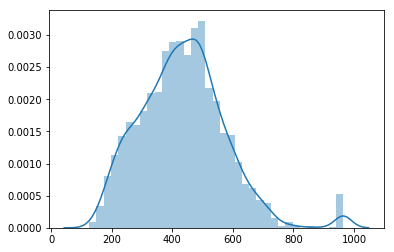

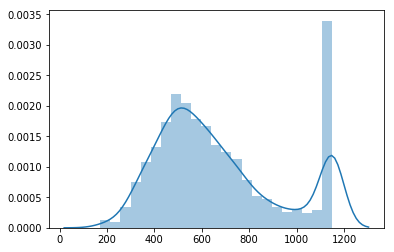

In [23]:
img_width = np.array(img_width)
img_height = np.array(img_height)
sns.distplot(img_width)
plt.show()
sns.distplot(img_height)
plt.show()


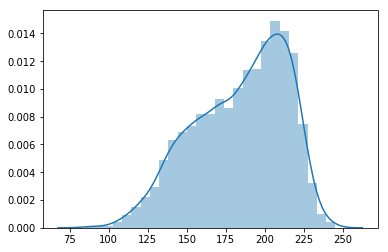

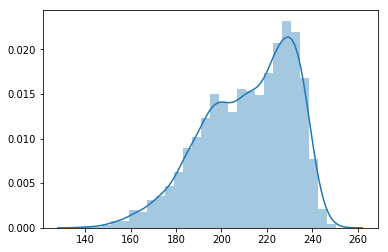

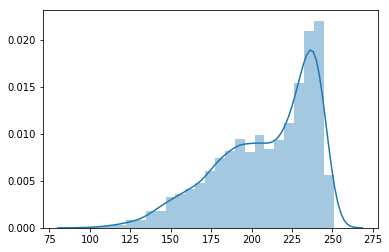

In [21]:
B = np.array(B)
G = np.array(G)
R = np.array(R)

sns.distplot(B)
plt.show()
sns.distplot(G)
plt.show()
sns.distplot(R)
plt.show()

In [22]:
print(np.mean(B),np.mean(G),np.mean(R))

184.025962363007 211.61230265352327 208.74597601697286


{'id': 1, 'image_id': 0, 'category_id': 3, 'iscrowd': 0, 'segmentation': [], 'area': [], 'bbox': [88, 253, 118, 42], 'minAreaRect': [[88, 298], [86, 256], [203, 249], [206, 291]]}
{'1': 317, '2': 1729, '3': 789, '4': 1783, '5': 697}


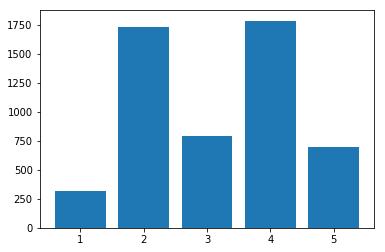

In [38]:
f = open('train_no_poly.json',encoding='utf-8')
gt = json.load(f)
print(gt['annotations'][0])
labels = {'1':0,'2':0,'3':0,'4':0,'5':0}
areas = []
for gt_info in gt['annotations']:  
    #labels.append(gt_info['category_id'])
    labels[str(gt_info['category_id'])] += 1
    areas.append(gt_info['bbox'][2]*gt_info['bbox'][3])
    
print(labels)


label_list = [labels[a] for a in labels]
plt.bar(range(1,len(label_list)+1), label_list)  
plt.show() 

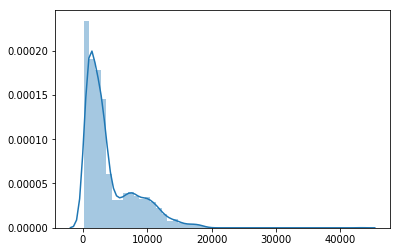

180
4125.417497648165
43263


In [41]:
 areas = np.array(areas)
sns.distplot(areas)
plt.show()
print(np.min(areas))
print(np.mean(areas))
print(np.max(areas))